In [1]:
import os
import pandas as pd
import numpy as np
import math
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [3]:
original_data = pd.read_csv('survey_results.csv', index_col=0)

# original_data

In [4]:
original_df = df = pd.DataFrame(original_data) 

## Split by assigned group (A/B)

In [5]:
group_A = original_df[original_df['group'] == "A"]
group_A['network_enc'] = group_A['question'].str.split('_').str[0]
group_A['task_type'] = group_A['question'].str.split('_').str[1]
group_A['task_entity'] = group_A['question'].str.split('_').str[2]
group_A['temporal_enc'] = group_A['question'].str.split('_').str[3]
group_A['correct'] = group_A['correct'].apply(str).str.lower()
# group_A = group_A.drop(['group', 'question', 'id'], axis='columns')

group_A

,group,id,question,answer,time,confidence,correct_answer,correct,zoom_timers,drag_timers,...,zoom_interactions,drag_interactions,highlight_interactions,slower_interactions,faster_interactions,slider_interactions,network_enc,task_type,task_entity,temporal_enc
264,A,0fe0c9f2-4f5c-44ab-933d-f0b25f7bbe47,m_t2_single_tl,1,73,2,4,false,[],[],...,0,0,0,0,0,17,m,t2,single,tl
265,A,0fe0c9f2-4f5c-44ab-933d-f0b25f7bbe47,nl_t3_single_tl,2,33,4,2,true,[],[],...,0,0,0,0,0,9,nl,t3,single,tl
266,A,0fe0c9f2-4f5c-44ab-933d-f0b25f7bbe47,nl_t2_clique_an,6,214,2,4,false,[],[],...,0,0,0,0,0,9,nl,t2,clique,an
267,A,0fe0c9f2-4f5c-44ab-933d-f0b25f7bbe47,nl_t2_single_jp,4,78,3,4,true,[],[],...,0,0,0,0,0,9,nl,t2,single,jp
268,A,0fe0c9f2-4f5c-44ab-933d-f0b25f7bbe47,nl_t3_clique_tl,5,99,2,1,false,[],[],...,0,0,0,0,0,19,nl,t3,clique,tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,A,fd0eab90-ea5f-48cf-9796-8115762f1f51,nl_t2_clique_jp,6,47,1,3,false,[],[],...,0,0,0,0,0,23,nl,t2,clique,jp
3969,A,fd0eab90-ea5f-48cf-9796-8115762f1f51,nl_t3_clique_jp,4,28,2,3,false,[],[],...,0,0,0,0,0,23,nl,t3,clique,jp
3970,A,fd0eab90-ea5f-48cf-9796-8115762f1f51,nl_t2_clique_si,3,74,1,6,false,[],[],...,0,0,0,0,0,23,nl,t2,clique,si
3971,A,fd0eab90-ea5f-48cf-9796-8115762f1f51,nl_t2_single_jp,4,37,4,4,true,[],[],...,0,0,0,0,0,23,nl,t2,single,jp


In [6]:
group_B = original_df[original_df['group'] == "B"]

group_B['network_enc'] = group_B['question'].str.split('_').str[0]
group_B['task_type'] = group_B['question'].str.split('_').str[1]
group_B['task_entity'] = group_B['question'].str.split('_').str[2]
group_B['temporal_enc'] = group_B['question'].str.split('_').str[3]

# group_B = group_B.drop(['group', 'question', 'id'], axis='columns')

group_B

,group,id,question,answer,time,confidence,correct_answer,correct,zoom_timers,drag_timers,...,zoom_interactions,drag_interactions,highlight_interactions,slower_interactions,faster_interactions,slider_interactions,network_enc,task_type,task_entity,temporal_enc
0,B,02f10e19-83e5-48a3-be35-5258e2e89c1a,m_t1_clique_si,3,754,1,3,True,[100],[],...,16,0,162,0,0,0,m,t1,clique,si
1,B,02f10e19-83e5-48a3-be35-5258e2e89c1a,nl_t3_single_si,1,86,5,1,True,"[156, 249, 310, 327, 1317, 177, 248, 243, 164,...","[4407, 3694, 3410, 3901, 2870, 701, 3894, 4036]",...,26,8,0,0,0,0,nl,t3,single,si
2,B,02f10e19-83e5-48a3-be35-5258e2e89c1a,m_t1_single_tl,3,62,5,3,True,"[156, 151, 203, 318, 162, 159, 158, 277, 1295,...",[],...,10,0,23,0,0,10,m,t1,single,tl
3,B,02f10e19-83e5-48a3-be35-5258e2e89c1a,m_t3_clique_jp,5,605,5,3,False,[],[],...,0,0,100,0,0,0,m,t3,clique,jp
4,B,02f10e19-83e5-48a3-be35-5258e2e89c1a,m_t1_single_si,2,40,5,2,True,[],[],...,0,0,10,0,0,0,m,t1,single,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,B,ffadb36b-5051-4684-b9cf-ed767a599434,m_t2_clique_si,3,46,1,6,False,[],[],...,0,0,1,0,0,0,m,t2,clique,si
4023,B,ffadb36b-5051-4684-b9cf-ed767a599434,m_t2_clique_an,3,202,1,4,False,[],[],...,0,0,1,0,0,0,m,t2,clique,an
4024,B,ffadb36b-5051-4684-b9cf-ed767a599434,m_t1_single_jp,3,20,5,3,True,[],[],...,0,0,7,0,0,0,m,t1,single,jp
4025,B,ffadb36b-5051-4684-b9cf-ed767a599434,nl_t3_clique_si,4,126,1,5,False,"[76, 782, 2964]","[2488, 1398, 3334]",...,3,3,0,0,0,0,nl,t3,clique,si


## Split group by task type (T1/T2/T3)

### A

In [7]:
group_A_T1 = group_A[group_A['question'].str.contains('T1', case=False)]
# group_A_T1

In [8]:
group_A_T2 = group_A[group_A['question'].str.contains('T2', case=False)]
# group_A_T2

In [9]:
group_A_T3 = group_A[group_A['question'].str.contains('T3', case=False)]
# group_A_T3

### B

In [10]:
group_B_T1 = group_B[group_B['question'].str.contains('T1', case=False)]
# group_B_T1

In [11]:
group_B_T2 = group_B[group_B['question'].str.contains('T2', case=False)]
# group_B_T2

In [12]:
group_B_T3 = group_B[group_B['question'].str.contains('T3', case=False)]
# group_B_T3

## Split by network representation 

### Node-Link A+B

In [13]:
group_A_T1_NL = group_A_T1[group_A_T1['question'].str.contains('nl_', case=False)]
group_A_T1_NL['temporal_enc'] = group_A_T1_NL['question'].str.upper().str[-2:]
# group_A_T1_NL

In [14]:
group_A_T2_NL = group_A_T2[group_A_T2['question'].str.contains('nl_', case=False)]
group_A_T2_NL['temporal_enc'] = group_A_T2_NL['question'].str.upper().str[-2:]
# group_A_T2_NL

In [15]:
group_A_T3_NL = group_A_T3[group_A_T3['question'].str.contains('nl_', case=False)]
group_A_T3_NL['temporal_enc'] = group_A_T3_NL['question'].str.upper().str[-2:]
# group_A_T3_NL

In [16]:
group_B_T1_NL = group_B_T1[group_B_T1['question'].str.contains('nl_', case=False)]
group_B_T1_NL['temporal_enc'] = group_B_T1_NL['question'].str.upper().str[-2:]
# group_B_T1_NL

In [17]:
group_B_T2_NL = group_B_T2[group_B_T2['question'].str.contains('nl_', case=False)]
group_B_T2_NL['temporal_enc'] = group_B_T2_NL['question'].str.upper().str[-2:]
# group_B_T2_NL

In [18]:
group_B_T3_NL = group_B_T3[group_B_T3['question'].str.contains('nl_', case=False)]
group_B_T3_NL['temporal_enc'] = group_B_T3_NL['question'].str.upper().str[-2:]
# group_B_T3_NL

### Matrix A+B

In [19]:
group_A_T1_M = group_A_T1[group_A_T1['question'].str.contains('m_', case=False)]
group_A_T1_M['temporal_enc'] = group_A_T1_M['question'].str.upper().str[-2:]
# group_A_T1_M

In [20]:
group_A_T2_M = group_A_T2[group_A_T2['question'].str.contains('m_', case=False)]
group_A_T2_M['temporal_enc'] = group_A_T2_M['question'].str.upper().str[-2:]
# group_A_T2_M

In [21]:
group_A_T3_M = group_A_T3[group_A_T3['question'].str.contains('m_', case=False)]
group_A_T3_M['temporal_enc'] = group_A_T3_M['question'].str.upper().str[-2:]
# group_A_T3_M

In [22]:
group_B_T1_M = group_B_T1[group_B_T1['question'].str.contains('m_', case=False)]
group_B_T1_M['temporal_enc'] = group_B_T1_M['question'].str.upper().str[-2:]
# group_B_T1_M

In [23]:
group_B_T2_M = group_B_T2[group_B_T2['question'].str.contains('m_', case=False)]
group_B_T2_M['temporal_enc'] = group_B_T2_M['question'].str.upper().str[-2:]
# group_B_T2_M

In [24]:
group_B_T3_M = group_B_T3[group_B_T3['question'].str.contains('m_', case=False)]
group_B_T3_M['temporal_enc'] = group_B_T3_M['question'].str.upper().str[-2:]
# group_B_T3_M

## Bar and Whiskers Plots

[Text(0.5, 1.0, 'M T3')]

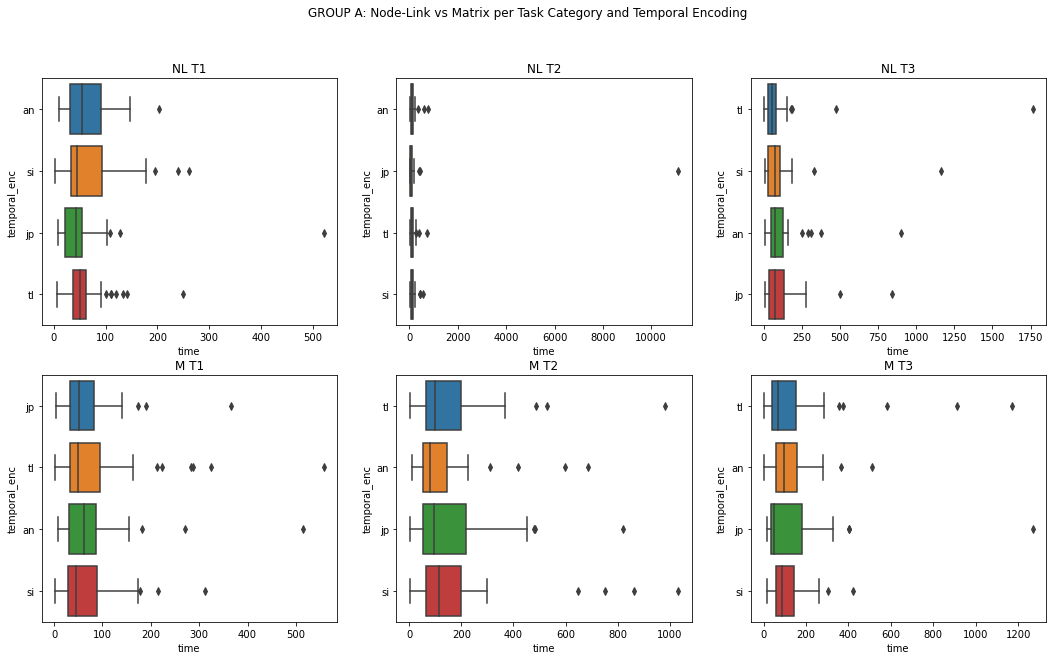

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('GROUP A: Node-Link vs Matrix per Task Category and Temporal Encoding')

sns.boxplot(ax=axes[0, 0], data=group_A[(group_A['network_enc'] == 'nl') & (group_A['task_type'] == 't1')], x='time', y='temporal_enc').set(title='NL T1')
sns.boxplot(ax=axes[0, 1], data=group_A[(group_A['network_enc'] == 'nl') & (group_A['task_type'] == 't2')], x='time', y='temporal_enc').set(title='NL T2')
sns.boxplot(ax=axes[0, 2], data=group_A[(group_A['network_enc'] == 'nl') & (group_A['task_type'] == 't3')], x='time', y='temporal_enc').set(title='NL T3')
sns.boxplot(ax=axes[1, 0], data=group_A[(group_A['network_enc'] == 'm') & (group_A['task_type'] == 't1')], x='time', y='temporal_enc').set(title='M T1')
sns.boxplot(ax=axes[1, 1], data=group_A[(group_A['network_enc'] == 'm') & (group_A['task_type'] == 't2')], x='time', y='temporal_enc').set(title='M T2')
sns.boxplot(ax=axes[1, 2], data=group_A[(group_A['network_enc'] == 'm') & (group_A['task_type'] == 't3')], x='time', y='temporal_enc').set(title='M T3')

[Text(0.5, 1.0, 'M T3')]

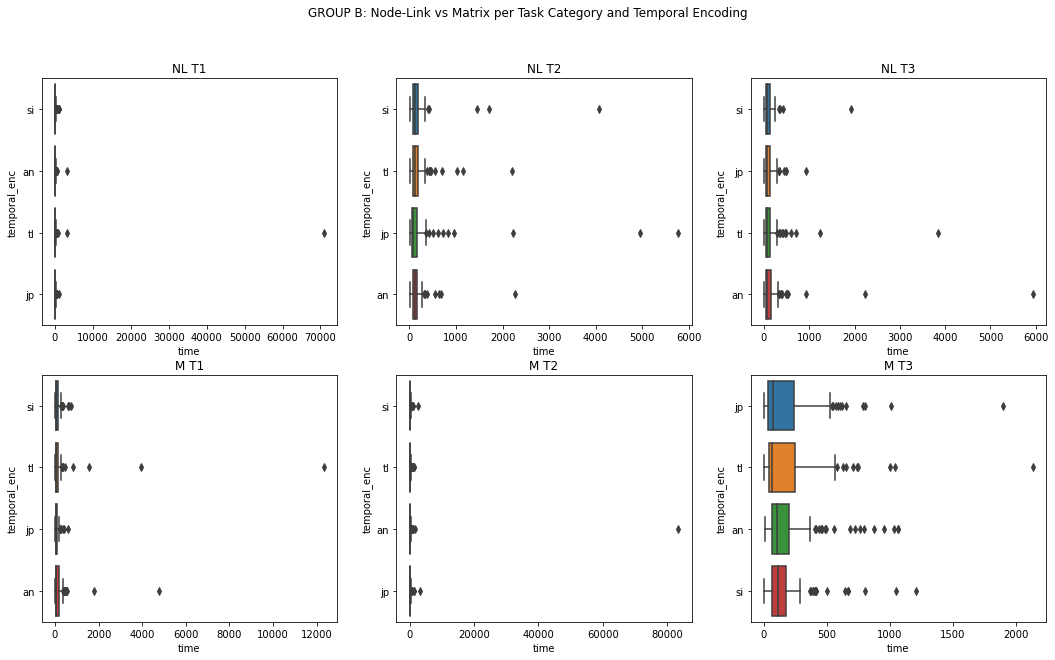

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('GROUP B: Node-Link vs Matrix per Task Category and Temporal Encoding')

sns.boxplot(ax=axes[0, 0], data=group_B[(group_B['network_enc'] == 'nl') & (group_B['task_type'] == 't1')], x='time', y='temporal_enc').set(title='NL T1')
sns.boxplot(ax=axes[0, 1], data=group_B[(group_B['network_enc'] == 'nl') & (group_B['task_type'] == 't2')], x='time', y='temporal_enc').set(title='NL T2')
sns.boxplot(ax=axes[0, 2], data=group_B[(group_B['network_enc'] == 'nl') & (group_B['task_type'] == 't3')], x='time', y='temporal_enc').set(title='NL T3')
sns.boxplot(ax=axes[1, 0], data=group_B[(group_B['network_enc'] == 'm') & (group_B['task_type'] == 't1')], x='time', y='temporal_enc').set(title='M T1')
sns.boxplot(ax=axes[1, 1], data=group_B[(group_B['network_enc'] == 'm') & (group_B['task_type'] == 't2')], x='time', y='temporal_enc').set(title='M T2')
sns.boxplot(ax=axes[1, 2], data=group_B[(group_B['network_enc'] == 'm') & (group_B['task_type'] == 't3')], x='time', y='temporal_enc').set(title='M T3')

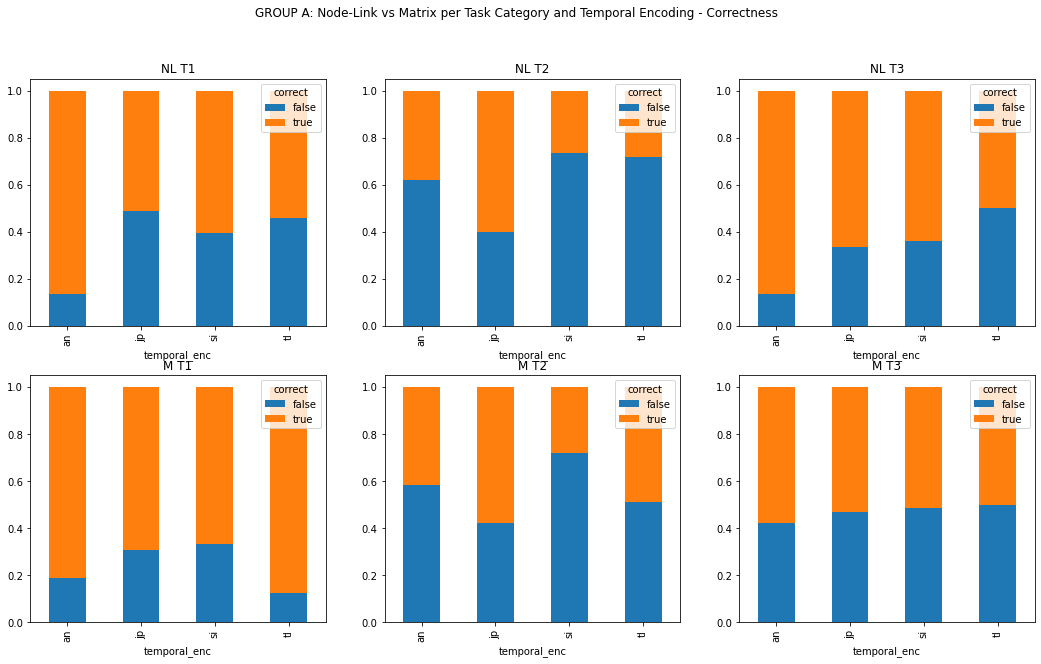

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('GROUP A: Node-Link vs Matrix per Task Category and Temporal Encoding - Correctness')

df1 = group_A[(group_A['network_enc'] == 'nl') & (group_A['task_type'] == 't1')]
df2 = group_A[(group_A['network_enc'] == 'nl') & (group_A['task_type'] == 't2')]
df3 = group_A[(group_A['network_enc'] == 'nl') & (group_A['task_type'] == 't3')]
df4 = group_A[(group_A['network_enc'] == 'm') & (group_A['task_type'] == 't1')]
df5 = group_A[(group_A['network_enc'] == 'm') & (group_A['task_type'] == 't2')]
df6 = group_A[(group_A['network_enc'] == 'm') & (group_A['task_type'] == 't3')]

df_list = [df1 ,df2, df3, df4, df5, df6]
titles = ['NL T1', 'NL T2', 'NL T3', 'M T1', 'M T2', 'M T3']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        pd.crosstab(df_list[count]['temporal_enc'], df_list[count]['correct'], normalize="index").plot(ax=axes[r,c], kind="bar",stacked=True).set(title=titles[count])
        count+=1

In [64]:
df1['question'].value_counts()

nl_t1_single_jp    20
nl_t1_clique_jp    19
nl_t1_single_si    19
nl_t1_clique_si    19
nl_t1_clique_an    19
nl_t1_single_tl    18
nl_t1_single_an    18
nl_t1_clique_tl    17
Name: question, dtype: int64

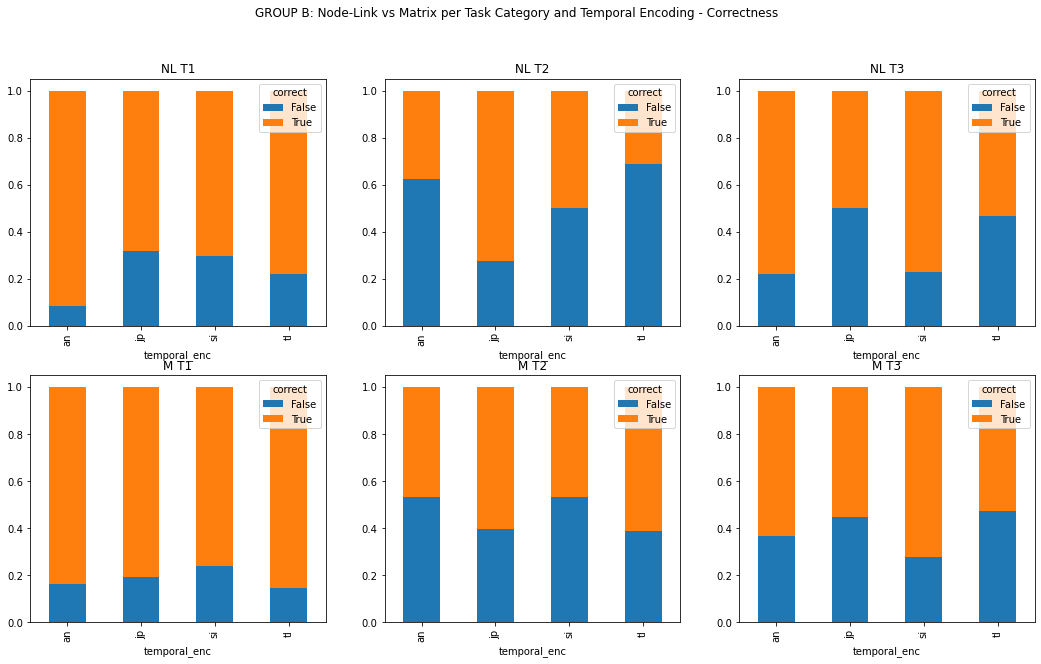

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('GROUP B: Node-Link vs Matrix per Task Category and Temporal Encoding - Correctness')

df1 = group_B[(group_B['network_enc'] == 'nl') & (group_B['task_type'] == 't1')]
df2 = group_B[(group_B['network_enc'] == 'nl') & (group_B['task_type'] == 't2')]
df3 = group_B[(group_B['network_enc'] == 'nl') & (group_B['task_type'] == 't3')]
df4 = group_B[(group_B['network_enc'] == 'm') & (group_B['task_type'] == 't1')]
df5 = group_B[(group_B['network_enc'] == 'm') & (group_B['task_type'] == 't2')]
df6 = group_B[(group_B['network_enc'] == 'm') & (group_B['task_type'] == 't3')]

df_list = [df1 ,df2, df3, df4, df5, df6]
titles = ['NL T1', 'NL T2', 'NL T3', 'M T1', 'M T2', 'M T3']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        pd.crosstab(df_list[count]['temporal_enc'], df_list[count]['correct'], normalize="index").plot(ax=axes[r,c], kind="bar",stacked=True).set(title=titles[count])
        count+=1

In [67]:
df1['question'].value_counts()

nl_t1_clique_jp    63
nl_t1_single_tl    63
nl_t1_single_jp    60
nl_t1_single_an    60
nl_t1_single_si    60
nl_t1_clique_tl    60
nl_t1_clique_si    58
nl_t1_clique_an    58
Name: question, dtype: int64